# Myers Briggs Personality Data Analysis
## By: Elena Gray, Rebecca Luner, Gerard Goucher

Before completing this project, please run the following lines of code in your terminal:

```
pip install pandas
pip install nltk
pip install collections
pip install scipy
pip install sklearn
pip install os
pip install afinn
pip install wordcloud
pip install matplotlib
pip install scipy
pip install re
pip install numpy
```

This is a group project I completed with two others in my Working with Big Data class. We were given a final assignment where we were to find a data set of our choosing, and utillize data science skills we were taught in the course on this data set. We were particularly intrigued by a data set we found on Kaggle regarding MBTI personality types. The following is the joint writeup we created, with code attached.

#### Introduction

Extraversion vs. Introversion, Sensing vs. Intuition, Thinking vs. Feeling, Judging vs. Perceiving: These four dichotomies define one’s personality based off of the Myers Briggs Type Indicator test. This personality test is a self-reporting questionnaire developed by Cook Briggs and her daughter Isabel Briggs Myers based on the theories presented by Carl Jung.

1. Extroversion vs. Introversion relates to the way in which people draw energy. Extroverts gain energy from others and prefer being social while introverts gather energy from being alone and tend to be quieter.

2. Sensing vs. Intuition defines how we collect information. Sensors gather facts from their environment and rely on their five senses for information, whereas intuitives look towards context and patterns, looking towards larger ideas and possibilities for information.

3. Thinking vs. Feeling relates to how people make decisions. Thinkers decide based on logic and analytics and tend to be level-headed, while feelers focus more on emotions, values, and the needs of others and tend to be empathetic and warm.

4. Judging vs. Perceiving defines how people organize. Judgers prefer structure and regulation, having detailed plans while perceivers desire things to be open and flexible and tend to improvise.

Personality typing categorizes people based on the ways in which they think and act. It is useful for sorting people into different groups, or for those of us seeking a better sense of self understanding. We seek to analyze data on the 16 unique personality types and draw insightful conclusions. In doing this we hope to understand the nuances of personality traits, what the real differences are between personalities and what similarities exist as well. We hope to be able to provide an alternative way to analyze someone’s personality, limiting the bias that is inherent in taking surveys or quizzes. Personalities are a fascinating, evolutionary phenomenon that we hope to use big data to shed more light on.

#### Data Collection and Cleaning

This brings us to our project. On Kaggle, came across a data set containing 8000+ data points from personalitycafe.com forums. This contains the last 50 forum posts of each individual who has self-identified as being a certain personality type. In order to clean the data, we first downloaded and imported the data set as a csv file into a python jupyter notebook file. We then organized the data by creating new directories for each of the 16 different personality types and filled the folders with created text files consisting of that personality type’s forum posts.

First, we will go through our data set, and begin to organize it into a dictionary.

In [1]:
#setting up dictionary for personality types 
import pandas as pd
data = pd.read_csv('mbti_1.csv')

In [3]:
import nltk
from nltk.corpus import stopwords

## The following step is done to remove any initial wording that is shared amongst all entries.

stopwords = stopwords.words('english')
stopwords.append("i'm")
stopwords.append("like")
stopwords.append("-")

In [4]:
## Creates a dictionary for each of the types with all of the posts relating to them. 
## This allows us to get a better grasp of representation of types, amongst other things.

post_dict = {}

for i in range(len(data['type'])):
    if data['type'][i] not in post_dict:
        post_dict[data['type'][i]] = [data['posts'][i]]
    else:
        post_dict[data['type'][i]].append(data['posts'][i])

In [5]:
# Function for returning all words for each personality, and cleans them up in a way that is understandable 
# for future analysis
from collections import Counter 
def list_all_words(personality):
    allWords = []
    
    for x in range(len(post_dict.get(personality))):
        posts = post_dict.get(personality)[x].lower().split("|||")
        words = []
        for post in posts:
            words += post.split()
        words = [w for w in words if w not in stopwords]
        for word in words:
            word = word.replace(".","")
            word = word.replace("'","")
            word = word.replace(",","")
            word = word.replace(":","")
            word = word.replace(";","")
            word = word.replace("!","")
        
        allWords = allWords + words
    return allWords

In [6]:
#function to make word cloud from all words. This is included here because it is used in the future
import matplotlib.pylab as plt
import wordcloud
def make_word_cloud(allWords):
    text = " ".join(allWords)
    wc = wordcloud.WordCloud(max_font_size=40).generate(text)
    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [7]:
#function to make histogram of top 10 words from all words
import numpy as np
import matplotlib.pyplot as plt

def make_histo(personality, allWords): 
    count = Counter(allWords)
    words_most_occur = count.most_common(10) 
    w = []
    frequency = []
    for i in range(len(words_most_occur)):
        w.append(words_most_occur[i][0])
        frequency.append(words_most_occur[i][1])
    plt.title(personality + " Top 10 Words")
    plt.xlabel("top 10 words")
    plt.xticks(rotation = 'vertical')

    plt.ylabel("frequency")
    plt.bar(w, frequency, color='b')
    plt.show()

#### 1. Breakdown of Personality Type: Our Data vs. Global

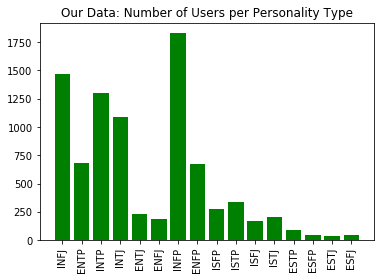

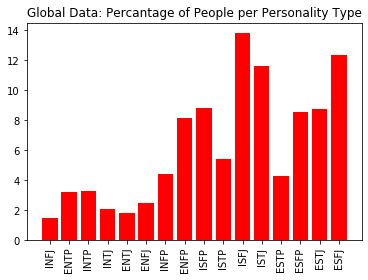

In [9]:
import matplotlib.pyplot as plt
#breakdown for our data
pers = []
num = []
for key in post_dict.keys():
    pers.append(key)
    num.append(len(post_dict.get(key)))
plt.bar(pers, num, color='g')
plt.xticks(rotation='vertical')
plt.title("Our Data: Number of Users per Personality Type")
plt.show()

#breakdown for global population
typee = []
for key in post_dict.keys():
    typee.append(key)
    
## The percentages noted here are global averages
percent = [1.5,3.2,3.3,2.1,1.8,2.5,4.4,8.1,8.8,5.4,13.8,11.6,4.3,8.5,8.7,12.3]
plt.bar(typee, percent, color='r')
plt.title("Global Data: Percantage of People per Personality Type")
plt.xticks(rotation='vertical')
plt.show()

Initially, to decipher how representative our data was of global personality types we looked at the histogram of the Personality Cafe data in comparison to global percentages. As you can see above, the data we have gathered has relatively different frequencies than the global ones, which is something to consider throughout all of our analysis of this data. Above is a histogram of our data and global data for direct comparison.

#### 2. Wordclouds and Top 10 Word Histograms for all 16 Personalities

In efforts to analyze each personality’s use of language, we created histograms for their top 10 words used and world clouds for each personality’s combined blog posts. To create the histograms, we found the 10 most frequent words in all of the blog posts for one personality type excluding stopwords. The results demonstrated interesting trends for each personality. The main consistency between them all was that the most-used word was “think,” probably because the theme of this online “cafe” is Myers-Briggs personalities and they are discussing their opinions and thoughts frequently. Some interesting differences to note is that “feeler” personalities verus “thinkers” all had the word “feel” in their top 10 words, except one, while none of the “thinker” personalities had the word “feel” in their top 10. Furthermore, extroverts talked about their own personality type more than introverts, on average, potentially due to their outgoing nature. The word clouds provided interesting visuals to demonstrate the differences for all the words used beyond the top 10. 

In [ ]:
# THE ANALYSTS

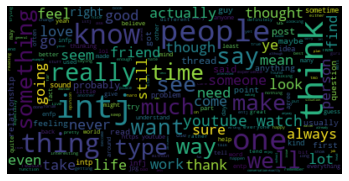

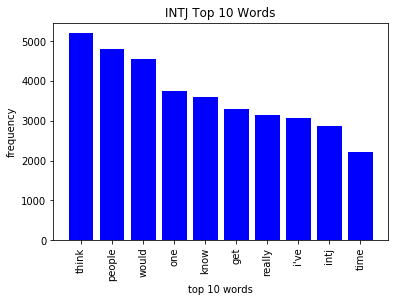

In [10]:
#INTJ: The Architect
intj_list = list_all_words('INTJ')
make_word_cloud(intj_list)
make_histo('INTJ', intj_list)

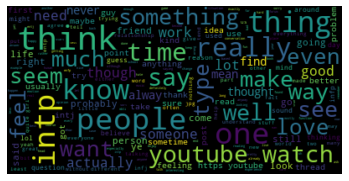

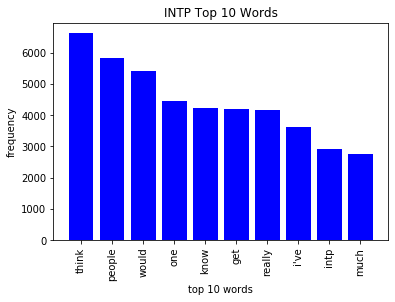

In [25]:
#INTP: The Logician
intp_list = list_all_words('INTP')
make_word_cloud(intp_list)
make_histo('INTP', intp_list)

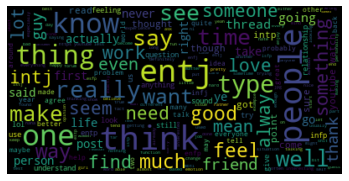

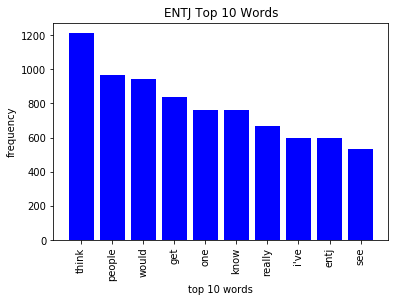

In [26]:
#ENTJ: The Commander
entj_list = list_all_words('ENTJ')
make_word_cloud(entj_list)
make_histo('ENTJ', entj_list)

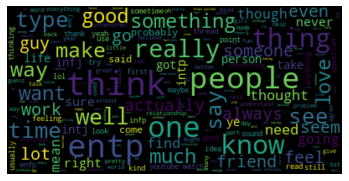

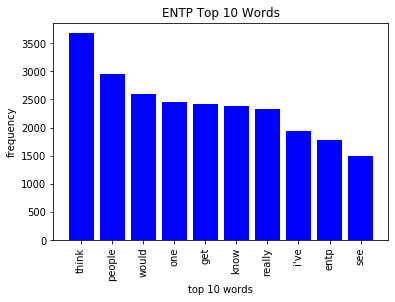

In [27]:
#ENTP: The Debater
entp_list = list_all_words('ENTP')
make_word_cloud(entp_list)
make_histo('ENTP', entp_list)

In [ ]:
# THE DIPLOMATS

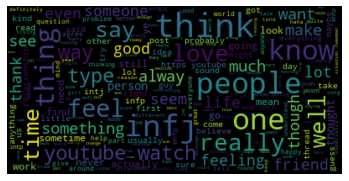

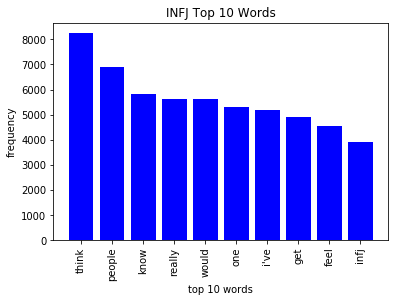

In [28]:
#INFJ: The Advocate
infj_list = list_all_words('INFJ')
make_word_cloud(infj_list)
make_histo('INFJ', infj_list)

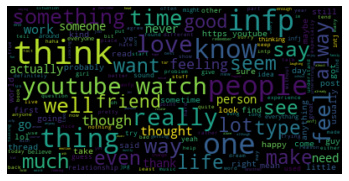

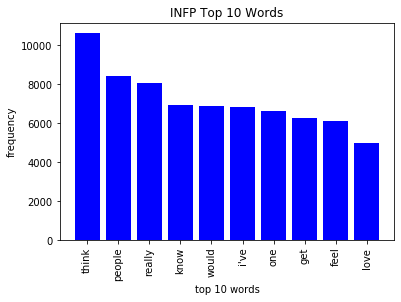

In [29]:
#INFP: The Mediator
infp_list = list_all_words('INFP')
make_word_cloud(infp_list)
make_histo('INFP', infp_list)

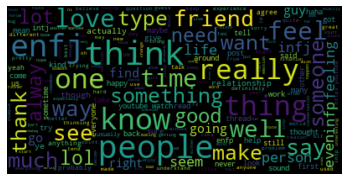

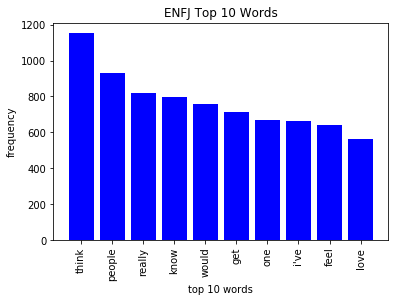

In [30]:
#ENFJ: The Protagonist
enfj_list = list_all_words('ENFJ')
make_word_cloud(enfj_list)
make_histo('ENFJ', enfj_list)

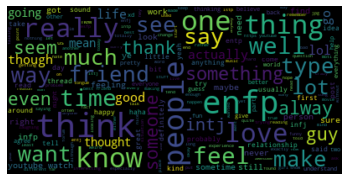

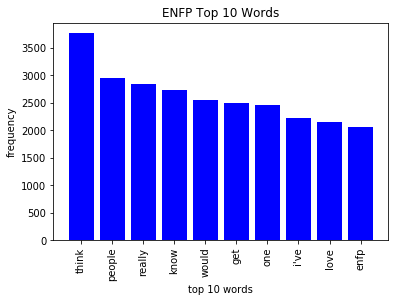

In [31]:
#ENFP: The Campaigner
enfp_list = list_all_words('ENFP')
make_word_cloud(enfp_list)
make_histo('ENFP', enfp_list)

In [ ]:
# THE SENTINELS 

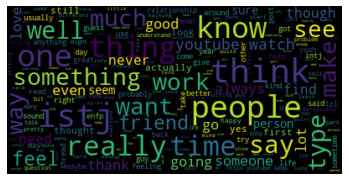

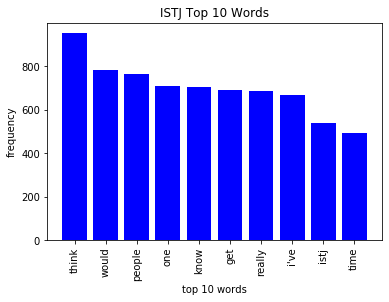

In [32]:
#ISTJ: The Logistician
istj_list = list_all_words('ISTJ')
make_word_cloud(istj_list)
make_histo('ISTJ', istj_list)

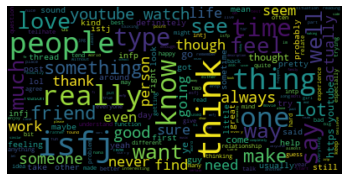

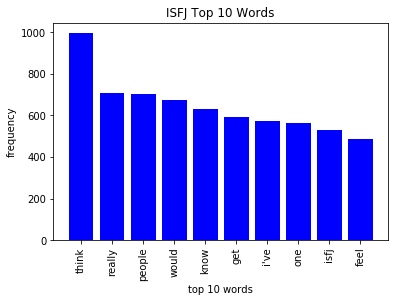

In [34]:
#ISFJ: The Defender
isfj_list = list_all_words('ISFJ')
make_word_cloud(isfj_list)
make_histo('ISFJ', isfj_list)

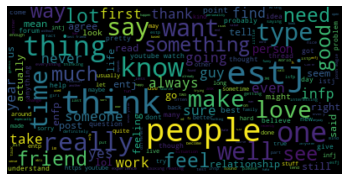

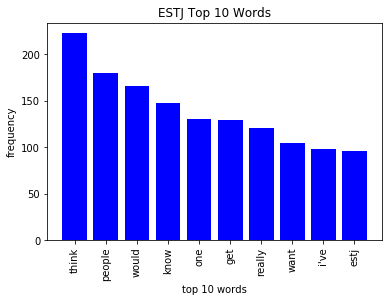

In [35]:
#ESTJ: The Executive
estj_list = list_all_words('ESTJ')
make_word_cloud(estj_list)
make_histo('ESTJ', estj_list)

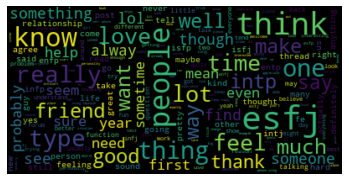

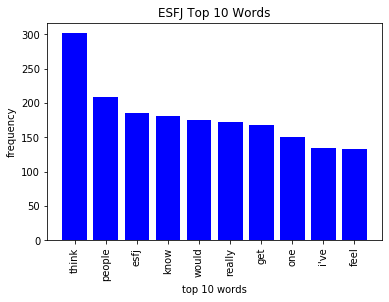

In [36]:
#ESFJ: The Consul
esfj_list = list_all_words('ESFJ')
make_word_cloud(esfj_list)
make_histo('ESFJ', esfj_list)

In [ ]:
# THE EXPLORERS

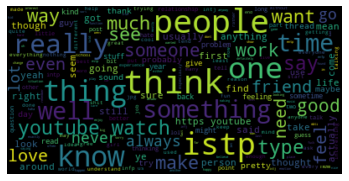

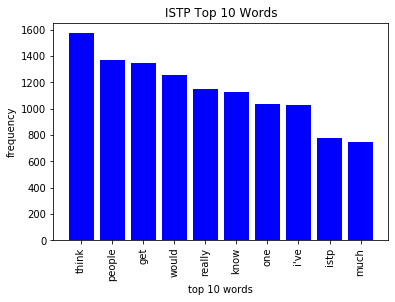

In [37]:
#ISTP: The Virtuoso
istp_list = list_all_words('ISTP')
make_word_cloud(istp_list)
make_histo('ISTP', istp_list)

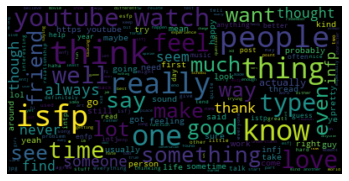

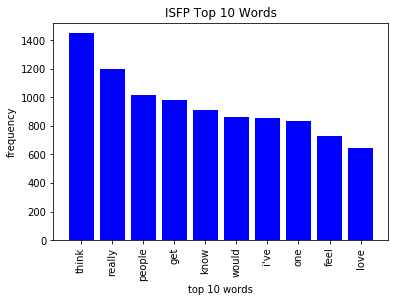

In [38]:
#ISFP: The Adventurer
isfp_list = list_all_words('ISFP')
make_word_cloud(isfp_list)
make_histo('ISFP', isfp_list)

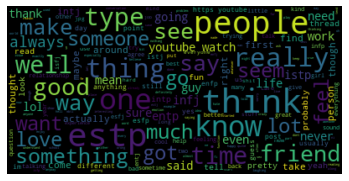

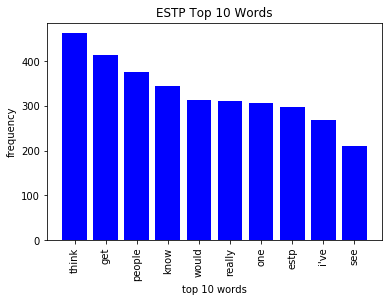

In [39]:
#ESTP: The Entrepreneur
estp_list = list_all_words('ESTP')
make_word_cloud(estp_list)
make_histo('ESTP', estp_list)

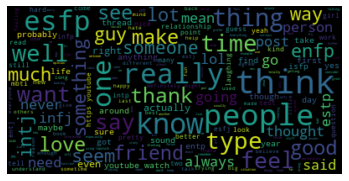

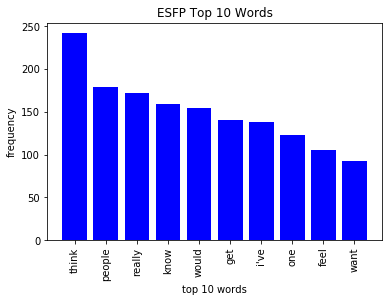

In [40]:
#ESFP: The Entertainer
esfp_list = list_all_words('ESFP')
make_word_cloud(esfp_list)
make_histo('ESFP', esfp_list)

#### 3. Who Loves the Hardest Personality Analysis

The following is an interesting article that posits that some MBTI personality types love harder than others. Here it is:

https://thoughtcatalog.com/lacey-ramburger/2019/01/ranking-the-myers-briggs-personality-types-on-who-loves-the-hardest-and-leaves-the-easiest/

Using the rankings from the above article on which Myers-Briggs personalities “love the hardest” we sought to determine the relationship between the use of the word “love” for each personality and their ranking. As you can see in the below scatter plot the two factors were indeed correlated.

Most love (16 Highest): 16 - ENFJ, 15 - ESFJ, 14 - INFP, 13 - INFJ, 12 - ISFJ, 11 - INTJ, 10 - ESTJ, 9 - ISTJ, 8 -ENFP, 7 - ISFP, 6 - ESFP, 5 - ENTP, 4 - ENTJ, 3 - ESTP, 2 - INTP, 1 - ISTP 

In [11]:
## The following function finds totaly amount of words per personality type and determines how frequently 
## the term love is used.

def find_love_count(personality):
    count = 0
    totalWords = []
    for x in range(len(post_dict.get(personality))):
        posts = post_dict.get(personality)[x].lower().split("|||")
        words = []
        for post in posts:
            words += post.split()
        for word in words:
            word = word.replace(".","")
            word = word.replace("'","")
            word = word.replace(",","")
            word = word.replace(":","")
            word = word.replace(";","")
            word = word.replace("!","")

        totalWords = totalWords + words
    count = totalWords.count("love") / len(post_dict.get(personality))
    return count

In [12]:
## Rankings determined from article above

x = []
y = []
y.append(find_love_count("ENFJ"))
x.append(16)
y.append(find_love_count("ESFJ"))
x.append(15)
y.append(find_love_count("INFP"))
x.append(14)
y.append(find_love_count("INFJ"))
x.append(13)
y.append(find_love_count("ISFJ"))
x.append(12)
y.append(find_love_count("INTJ"))
x.append(11)
y.append(find_love_count("ESTJ"))
x.append(10)
y.append(find_love_count("ISTJ"))
x.append(9)
y.append(find_love_count("ENFP"))
x.append(8)
y.append(find_love_count("ISFP"))
x.append(7)
y.append(find_love_count("ESFP"))
x.append(6)
y.append(find_love_count("ENTP"))
x.append(5)
y.append(find_love_count("ENTJ"))
x.append(4)
y.append(find_love_count("ESTP"))
x.append(3)
y.append(find_love_count("INTP"))
x.append(2)
y.append(find_love_count("ISTP"))
x.append(1)

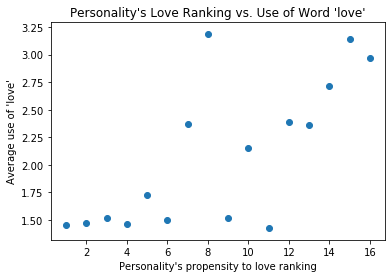

In [13]:
#create scatter plot for relationship
colors = (0,0,0)
plt.scatter(x, y)
plt.xlabel("Personality's propensity to love ranking")
plt.ylabel("Average use of 'love'")
plt.title("Personality's Love Ranking vs. Use of Word 'love'")

plt.show()

In [14]:
#determine significance of relationship

In [16]:
from sklearn.decomposition import PCA
import numpy as np
yvalrange = max(y) - min(y)
print("Range of freq " + str(yvalrange))

Range of freq 1.7679980989238553


In [19]:
from scipy.stats import pearsonr
corr, _ = pearsonr(x,y)
print("Correlation " + str(corr))
from scipy import stats
pval = stats.pearsonr(x,y)[1]
print("P-value " + str(pval))

Correlation 0.7197903199563727
P-value 0.0016672888550700409


The two variables have a positive correlation of 0.72 and a p-value of 0.002, which implies that this relationship is significant.

#### 4. Sentiment Scores for Each Personality and Comparing Attributes

We thought it would be interesting to delve into a sentiment analysis for each of the 16 unique Meyers-Briggs Personality types. In order to do so, we combined all text files pertaining to a specific personality type, removed all commonly used stop words, numbers and links, and computed the average sentiment score for each personality type using the AFINN Sentiment Lexicon. This lexicon consists of a list of terms rated by their valence value indicated by an integer between -5 and 5. The ratings were created by Finn Nielsen from 2009–2011. We then visualized the data by plotting the sentiment values for each of the personality types in a bar chart in attempts to find larger trends. We discovered that the personality type with the lowest sentiment score is ISTP and the personality type with the highest sentiment score is ESFJ.

Following this, we desired to discover more apparent trends, and thus decided to divide the data comparing each of the four sets of dichotomies: introversion vs. extraversion, sensing vs. intuition, thinking vs. feeling, and judging vs. perceiving. This is shown below our personality specific sentiment scores.

In [25]:
#Creating directories to store individual data points
import os

path = os.getcwd()

if os.path.exists(path + '/data'):
    path = path + '/data'
else:
    os.mkdir(path + '/data')
    path = path + '/data'
print(path)

/Users/gerardgoucher/Desktop/MBTI Final Project/data


In [33]:

#Making directories for each of the 16 personality types in the data folder

for key in post_dict:
    if os.path.exists(path + '/' + key):
        print(key + " directory already exists!")
    else:
        os.mkdir(path + '/' + key)
        print('New path created for ' + key)

        
#Making directories for each of the 8 options         

eight_options = ['I', 'E', 'S', 'N', 'T', 'F', 'J', 'P']

for entry in eight_options:
    if os.path.exists(path + '/' + entry):
        print(entry + " directory already exists!")
    else:
        os.mkdir(path + '/' + entry)
        print('New path created for ' + entry)

INFJ directory already exists!
ENTP directory already exists!
INTP directory already exists!
INTJ directory already exists!
ENTJ directory already exists!
ENFJ directory already exists!
INFP directory already exists!
ENFP directory already exists!
ISFP directory already exists!
ISTP directory already exists!
ISFJ directory already exists!
ISTJ directory already exists!
ESTP directory already exists!
ESFP directory already exists!
ESTJ directory already exists!
ESFJ directory already exists!
I directory already exists!
E directory already exists!
S directory already exists!
N directory already exists!
T directory already exists!
F directory already exists!
J directory already exists!
P directory already exists!


In [36]:
for key in post_dict:
    os.chdir(path + '/' + key)
    f = open(key + ".txt","w+")
    for elem in post_dict[key]:
        f.write(elem)
    f.close

In [37]:
import nltk
nltk.download('stopwords')
from afinn import Afinn
af = Afinn()
import os
import re
import matplotlib.pyplot as plt


# Get a list of stopwords from nltk
stopwords = nltk.corpus.stopwords.words("english")

def get_clean_words(character_filename, personality_type):
    def _isnum(w):
        try:
            int(w)
            return True
        except ValueError:
            return False
        
    # Load her markup
    with open(path + "/%s/%s" % (character_filename, personality_type)) as fp:
        markup = fp.read()

    # Set words to lowercase and remove them if they are stop words
    words = [w.lower() for w in re.findall('\w+', markup) if w.lower() not in stopwords]

    # Remove numbers
    words = [w for w in words if not _isnum(w)]
    
    #Remove links
    links = ["https", "www", "com"]
    words = [w for w in words if w not in links]

    return words

# Example
print(get_clean_words("ENFJ", "ENFJ.txt")[0:10])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gerardgoucher/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['youtube', 'watch', 'v', 'plaaikvhvzs', 'went', 'break', 'months', 'ago', 'together', 'years']


In [52]:
def get_score(mbti_type):
    '''Gets the sentiment score of each type'''
    
    score = 0
    words = get_clean_words(mbti_type, mbti_type + ".txt")
    
    for each in words:
        score += af.score(each)
    
    if len(words) > 0:
        score = score/len(words)
        
    return score

var_names = ['ISTJscore', 'ISFJscore', 'INFJscore', 'INTJscore', 'ISTPscore', 'ISFPscore', 'INFPscore', 'INTPscore', 
             'ESTPscore', 'ESFPscore', 'ENFPscore', 'ENTPscore', 'ESTJscore', 'ESFJscore', 'ENFJscore', 'ENTJscore']

for value in var_names:
    globals()[value] = get_score(value[:4])
;

''

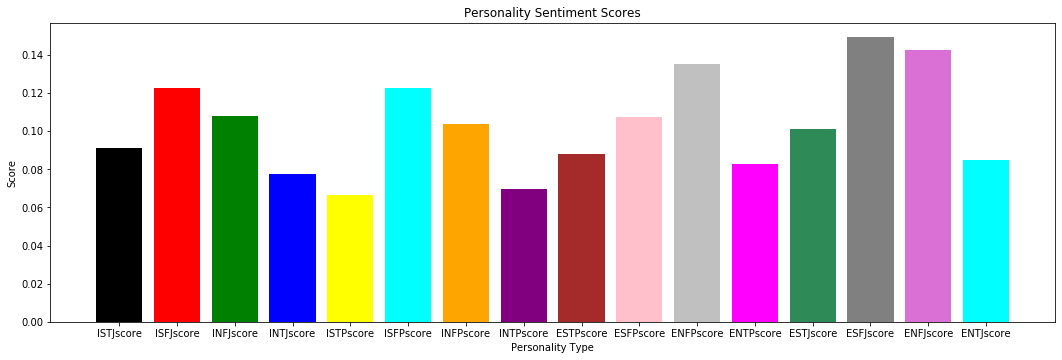

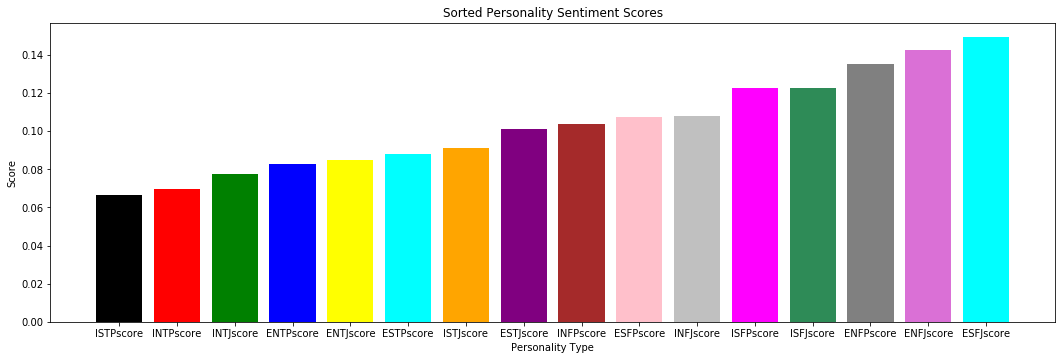

In [53]:
import numpy as np
import matplotlib.pyplot as plt
allscores = [ISTJscore, ISFJscore, INFJscore, INTJscore, ISTPscore, ISFPscore, INFPscore, INTPscore, 
             ESTPscore, ESFPscore, ENFPscore, ENTPscore, ESTJscore, ESFJscore, ENFJscore, ENTJscore]

sortedAllscores = sorted(allscores)
 
sortedlabels = ["ISTPscore", "INTPscore", "INTJscore", "ENTPscore", "ENTJscore", "ESTPscore", "ISTJscore", "ESTJscore", 
             "INFPscore", "ESFPscore", "INFJscore", "ISFPscore", "ISFJscore", "ENFPscore", "ENFJscore", "ESFJscore"]
    
    
y_pos = np.arange(len(var_names))


plt.bar(y_pos, allscores, color=(['black', 'red', 'green', 'blue', 'yellow', 'cyan', 'orange', 'purple',
                                 'brown', 'pink', 'silver', 'magenta', 'seagreen', 'gray', 'orchid', 'aqua']))
plt.xticks(y_pos, var_names)
plt.title("Personality Sentiment Scores")
plt.ylabel("Score")
plt.xlabel("Personality Type")
fig= plt.gcf()
fig.set_size_inches(18, 5.5)
plt.show()


plt.bar(y_pos, sortedAllscores, color=(['black', 'red', 'green', 'blue', 'yellow', 'cyan', 'orange', 'purple',
                                 'brown', 'pink', 'silver', 'magenta', 'seagreen', 'gray', 'orchid', 'aqua']))
plt.xticks(y_pos, sortedlabels)
plt.title("Sorted Personality Sentiment Scores")
plt.ylabel("Score")
plt.xlabel("Personality Type")
fig= plt.gcf()
fig.set_size_inches(18, 5.5)
plt.show()

0.0951599323322834
0.11131249271891296


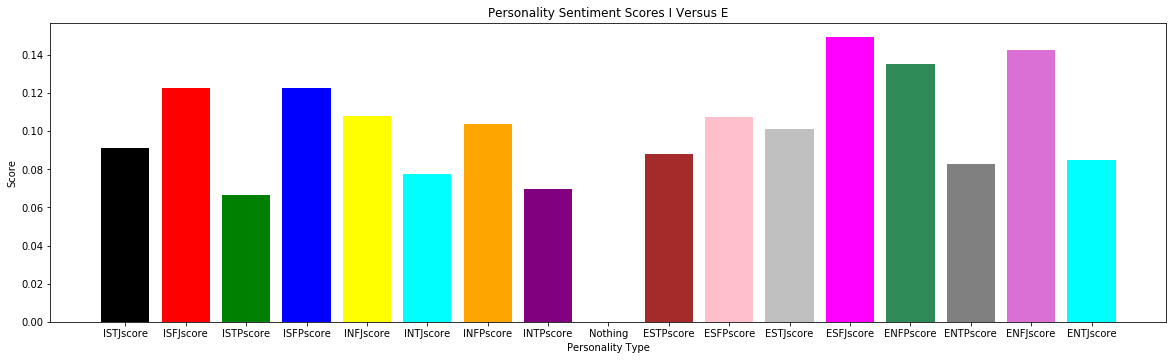

In [55]:
#I versus E
allscores = [ISTJscore, ISFJscore, ISTPscore, ISFPscore,INFJscore, INTJscore, INFPscore, INTPscore, 0, 
             ESTPscore, ESFPscore, ESTJscore, ESFJscore, ENFPscore, ENTPscore, ENFJscore, ENTJscore]

labels = ["ISTJscore", "ISFJscore", "ISTPscore", "ISFPscore", "INFJscore", "INTJscore", "INFPscore", "INTPscore", "Nothing",
        "ESTPscore", "ESFPscore", "ESTJscore", "ESFJscore", "ENFPscore", "ENTPscore", "ENFJscore", "ENTJscore"]

I = allscores[0:8]
E = allscores[9:]

print(sum(I)/len(I))
print(sum(E)/len(E))

y_pos = np.arange(len(labels))

plt.bar(y_pos, allscores, color=(['black', 'red', 'green', 'blue', 'yellow', 'cyan', 'orange', 'purple', 'black', 'brown', 'pink', 'silver', 'magenta', 'seagreen', 'gray', 'orchid', 'aqua']))
plt.xticks(y_pos, labels)
plt.title("Personality Sentiment Scores I Versus E")
plt.ylabel("Score")
plt.xlabel("Personality Type")
fig= plt.gcf()
fig.set_size_inches(20, 5.5)
plt.show()

Extroverted personality types yield a higher personality score than introverted personality types (averages of 0.1113 vs. 0.0951 with a difference of 0.0162). Our conjecture is that this is due to the fact that extroverts are defined as “outgoing and socially confident,” thus their posts might be filled with stronger positive emotions than introverts who tend to be shy and might conceal emotions.

0.10598308888686928
0.10048933616432706


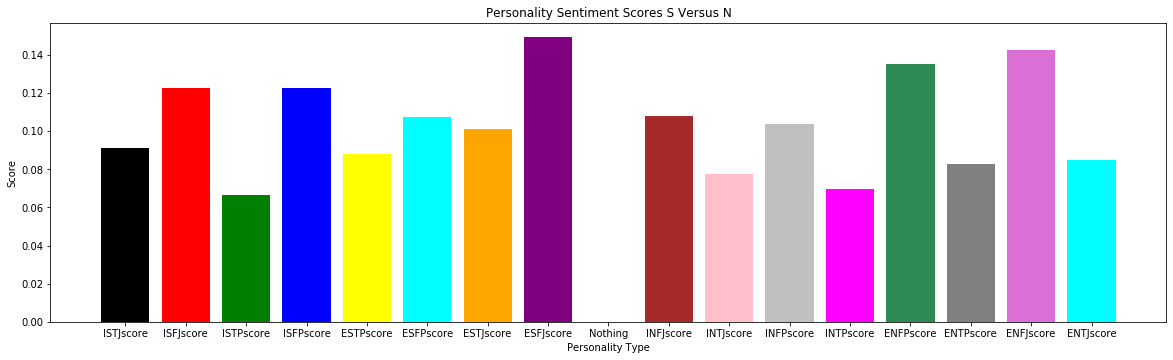

In [56]:
#S versus N
allscores = [ISTJscore, ISFJscore, ISTPscore, ISFPscore, ESTPscore, ESFPscore, ESTJscore, ESFJscore, 0,
             INFJscore, INTJscore, INFPscore, INTPscore, ENFPscore, ENTPscore, ENFJscore, ENTJscore]

labels = ["ISTJscore", "ISFJscore", "ISTPscore", "ISFPscore", "ESTPscore", "ESFPscore", "ESTJscore", "ESFJscore", "Nothing",
        "INFJscore", "INTJscore", "INFPscore", "INTPscore", "ENFPscore", "ENTPscore", "ENFJscore", "ENTJscore"]

S = allscores[0:8]
N = allscores[9:]

print(sum(S)/len(S))
print(sum(N)/len(N))

y_pos = np.arange(len(labels))

plt.bar(y_pos, allscores, color=(['black', 'red', 'green', 'blue', 'yellow', 'cyan', 'orange', 'purple', 'black', 'brown', 'pink', 'silver', 'magenta', 'seagreen', 'gray', 'orchid', 'aqua']))
plt.xticks(y_pos, labels)
plt.title("Personality Sentiment Scores S Versus N")
plt.ylabel("Score")
plt.xlabel("Personality Type")
fig= plt.gcf()
fig.set_size_inches(20, 5.5)
plt.show()

Average sentiment scores for sensing and intuitive personality types were roughly equivalent, 0.1059 vs. 0.1004, with sensing being slightly higher. This miniscule difference of 0.0055 demonstrates that this distinction produces little effect on sentiment scores.

0.08257240211196167
0.12390002293923466


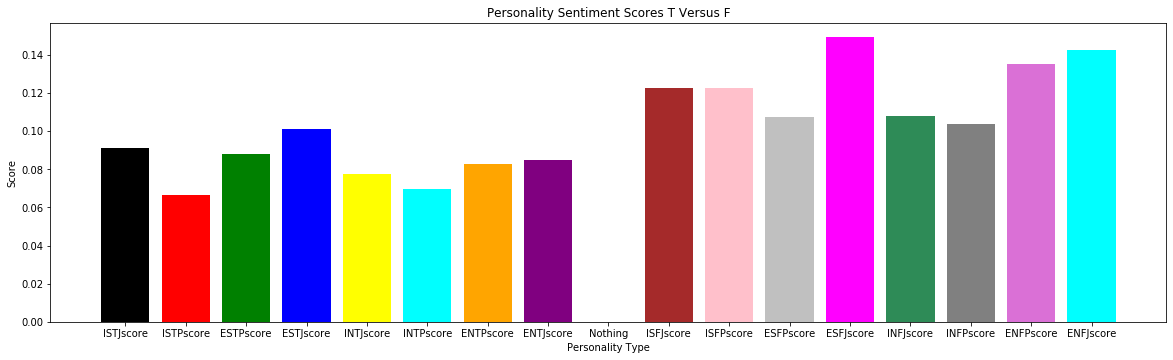

In [57]:
#T versus F
allscores = [ISTJscore, ISTPscore, ESTPscore, ESTJscore, INTJscore, INTPscore, ENTPscore, ENTJscore, 0, 
             ISFJscore, ISFPscore, ESFPscore, ESFJscore, INFJscore, INFPscore, ENFPscore, ENFJscore]

labels = ["ISTJscore", "ISTPscore", "ESTPscore", "ESTJscore", "INTJscore", "INTPscore", "ENTPscore", "ENTJscore", "Nothing",
        "ISFJscore", "ISFPscore", "ESFPscore", "ESFJscore", "INFJscore", "INFPscore", "ENFPscore", "ENFJscore"]
 
T = allscores[0:8]
F = allscores[9:]

print(sum(T)/len(T))
print(sum(F)/len(F))

y_pos = np.arange(len(labels))

plt.bar(y_pos, allscores, color=(['black', 'red', 'green', 'blue', 'yellow', 'cyan', 'orange', 'purple', 'black', 'brown', 'pink', 'silver', 'magenta', 'seagreen', 'gray', 'orchid', 'aqua']))
plt.xticks(y_pos, labels)
plt.title("Personality Sentiment Scores T Versus F")
plt.ylabel("Score")
plt.xlabel("Personality Type")
fig= plt.gcf()
fig.set_size_inches(20, 5.5)
plt.show()

Comparing thinking and feeling personality types yielded the most prominent discrepancy between average sentiment scores with thinking possessing a score of 0.0825 and feeling possessing a score of 0.1239 (difference of 0.0414). We speculate that this is due to the fact that thinkers tend to observe, analyze, and make decisions quietly based on logic, while feelers are more emotive, making decisions based on emotions and thus might broadcast their feelings to others.

0.10960169408231314
0.09687073096888317


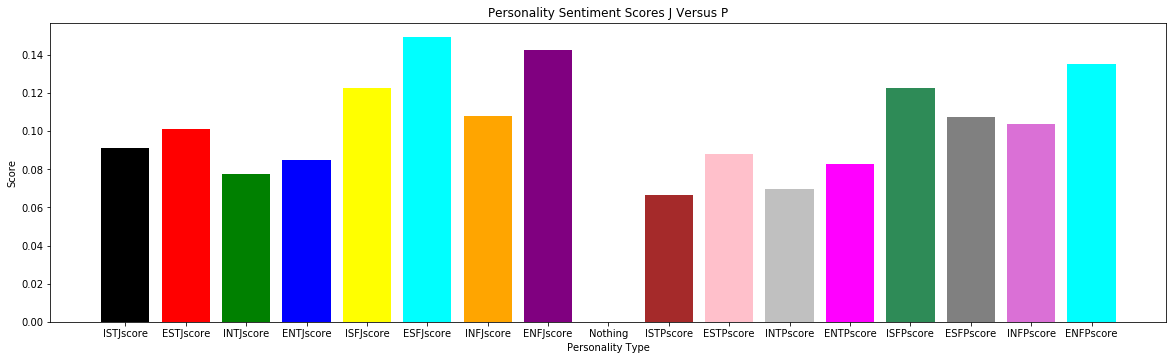

In [58]:
#J versus P
allscores = [ISTJscore, ESTJscore, INTJscore, ENTJscore, ISFJscore, ESFJscore, INFJscore, ENFJscore, 0, 
             ISTPscore, ESTPscore, INTPscore, ENTPscore, ISFPscore, ESFPscore, INFPscore, ENFPscore]

labels = ["ISTJscore", "ESTJscore", "INTJscore", "ENTJscore", "ISFJscore", "ESFJscore", "INFJscore", "ENFJscore", "Nothing",
        "ISTPscore", "ESTPscore", "INTPscore", "ENTPscore", "ISFPscore", "ESFPscore", "INFPscore", "ENFPscore"]

J = allscores[0:8]
P = allscores[9:]

print(sum(J)/len(J))
print(sum(P)/len(P))

y_pos = np.arange(len(labels))

plt.bar(y_pos, allscores, color=(['black', 'red', 'green', 'blue', 'yellow', 'cyan', 'orange', 'purple', 'black', 'brown', 'pink', 'silver', 'magenta', 'seagreen', 'gray', 'orchid', 'aqua']))
plt.xticks(y_pos, labels)
plt.title("Personality Sentiment Scores J Versus P")
plt.ylabel("Score")
plt.xlabel("Personality Type")
fig= plt.gcf()
fig.set_size_inches(20, 5.5)
plt.show()

The final comparison was between judging and perceiving; judging personality types have a higher sentiment average of 0.1096 while perceiving personality types have a lower sentiment average of 0.0968 (difference of 0.0128).

Overall, the sentiment analysis of each of the 16 personality types along with the comparisons of the four personality dichotomies allowed us to discover that the ranking of sentiment scores for each of the 8 categories from highest to lowest is: Feeling (0.1239), Extrovert (0.1113), Judging (0.1096), Sensing (0.1059), Intuitive (0.1004), Perceiving (0.0968), Introvert (0.0951), Thinking (0.0825). Thus, the personality type possessing the highest sentiment score should be ESFJ, which is consistent with the graph of sorted personality types. The highest indicator of having a higher sentiment score is the distinction between thinking and feeling, followed by being an extrovert or introvert, then deciding between judging and perceiving, and finally the choice between sensing or intuition.

#### 5. Predicting Aspects of Personalities through Sentiment Analysis

Considering the large pool of data that we have, we decided to utilize ML techniques to try to determine categorizations for individual sets of posts.

At first, we attempted to utilize the Decision Tree classifier to determine individual traits of MBTI. The features we fed into this classifier were all of the non-target letters of the personality type, and the sentiment score of the user’s posts (using Afinn). Our results were mixed, E vs I were very accurately predicted, as well as S vs. N, but then our accuracy dropped off significantly. We posit this to be because of the individual nature of decision trees, decisions are made with only part of the vital features in mind. This code is shown below.

In [59]:
import nltk, re
from afinn import Afinn
af = Afinn()

In [60]:
## The following function allows us to parse through the words and do a sentiment analysis onto it...
## we will use this a lot later

stopwords = nltk.corpus.stopwords.words("english")

def sort_information(posts):
    '''This function finds the words and does sentiment analysis on each of the posts by the individuals'''
    
    # Remove dividers
    post = re.sub(r'[|||]', ' ', posts)
    
    #Remove hyperlinks
    post = re.sub(r'http\S+', ' ', post)
    
    # Set words to lowercase and remove them if they are stop words, plus put in list form.
    words = [w.lower() for w in re.findall('\w+', post) if w.lower() not in stopwords]
    
    # Remove numbers
    #words = [w for w in words if not _isnum(w)]
    
    score = 0
    
    for word in words:
        score += af.score(word)
    
    if len(words) == 0:
        return 0
    
    else:
        return int(float(str(score/len(words))[:5])*1000) + 463 #to get the min to be 0

In [61]:
info_matrix = []

for i in range(len(data['type'])):
    info_list = []
    
    #Makes sentiment score first
    info_list.append(sort_information(data['posts'][i]))
    
    #Differentiates between E and I, creates index
    if data['type'][i][0] == 'E':
        info_list.append(1)
    else:
        info_list.append(0)
        
    #Differentiates between S and N
    if data['type'][i][1] == 'S':
        info_list.append(1)
    else:
        info_list.append(0)
        
    #Differentiates between T and F
    if data['type'][i][2] == 'T':
        info_list.append(1)
    else:
        info_list.append(0)
        
    #Differentiates between J and P
    if data['type'][i][3] == 'J':
        info_list.append(1)
    else:
        info_list.append(0)
        
    info_matrix.append(info_list)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Possible set union at position 2
  # Remove the CWD from sys.path while we load stuff.


Now, we will train an SK learn bernoulli classifier on the data, and see if we can use sentiment analysis to accurately predict aspects of personalities. First, we will do so with introverts vs. extroverts.

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
def target_maker(list, index):
    attributes = []
    target = []
    
    for item in list:
        att = []
        for i in range(len(item)):
            if i == index:
                target.append(item[i])
            else:
                att.append(item[i])
        attributes.append(att)
    
    return (attributes, target)

In [64]:
e_i = target_maker(info_matrix, 1)
s_n = target_maker(info_matrix, 2)
t_f = target_maker(info_matrix, 3)
j_p = target_maker(info_matrix, 4)

In [65]:
from sklearn.model_selection import train_test_split

def predictor_accuracy(arrays):
    '''Takes training and target array and predicts which category an individual will fall into'''
    
    #Test size arbitrarily set to .20
    X_train, X_test, y_train, y_test = train_test_split(arrays[0], arrays[1], test_size=0.20)

    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, y_train)
    final = classifier.predict(X_test)
    
    correct = 0
    count = 0
    
    for i in range(len(y_test)):
        if y_test[i] == final[i]:
            count += 1
            correct += 1
        else:
            count += 1
            
    print(correct/count)

In [66]:
predictor_accuracy(e_i)
predictor_accuracy(s_n)
predictor_accuracy(t_f)
predictor_accuracy(j_p)

0.7371757925072047
0.8380403458213257
0.579250720461095
0.5861671469740634


Utilizing the sentiment scores didn’t seem to offer enough features to train a classifier on, so we decided to expand and consider other options. We settled on using a TF-IDF metric, to see if there was some sort of vocabulary or unique characteristics of each type.

In [67]:
# Now, we will do TF-IDF analysis on the data as a whole to try to predict entire categories

from sklearn.feature_extraction.text import TfidfVectorizer

def tf_transformer(data):
    '''takes data and transformers it along TF-IDF lines for further transformation'''
    
    #sublinear_tf normalizes TF via tf = 1 + log(tf), min_df sets cutoff for frequency, 
    #ngram_range lets us consider how TF is created, by individual words and by twos to see if any words link
    #in a significant way. stop_words just removes stop words.
    tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(1, 2), stop_words='english')
    
    analyze_list = []
    types = []
    
    for i in range(len(data['type'])):
        analyze_list.append(data['posts'][i])
        types.append(data['type'][i])
        
    final_features = tfidf.fit_transform(analyze_list).toarray()
    
    return (final_features, types, tfidf)

In [68]:
tf_transformed = tf_transformer(data)

After some research, we decided to switch from using a decision tree to using the Linear Support Vector Classification given our usage of a TF-IDF array. This classifier takes a bunch of features as vectors, and is able to make a hyperplane, which is similar conceptually to a line of best fit, and uses this to predict categories of data given. This is particularly useful with our 16 different categories, and thus yields quite accurate results. To our amazement, the model built was able to predict personality types with a roughly 65% accuracy (on train, test, split selected test data), which we found to be quite high considering that there are 16 different categories.

In [69]:
from sklearn.svm import LinearSVC

# test size arbitrarily set to 20
X_train, X_test, y_train, y_test = train_test_split(tf_transformed[0], tf_transformed[1], test_size=0.20)

model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [70]:
correct = 0
count = 0

for i in range(len(X_test)):
    if y_pred[i] == y_test[i]:
        correct += 1
        count += 1
    else:
        count += 1
        
print(correct/count)

0.6858789625360231


Notably, looping through to predict the accuracy of our classifier on the overall data instead of the test data yielded a > 90% accuracy.

In [71]:
## Now, we will create a function that allows us to input strings of posts, and then returns predicted MBTI types.

def type_predictor(string):
    '''takes a string input and returns predicted MBTI type'''
    
    # First, we fit the string to the TF-IDF model
    
    transformation = tf_transformed[2].transform([string])
    
    pred = model.predict(transformation)
    
    return pred[0]

correct = 0
total = 0

for i in range(len(data['posts'])):
    if type_predictor(data['posts'][i]) == data['type'][i]:
        correct += 1
        total += 1
    else:
        total += 1

print(correct/total)

0.9371757925072046


After looking at the success of the LinearSVC classifier with predicting personality types, we decided to use this again to predict individual letters. To our surprise, the accuracy of these individual letter predictions were near identical to that of the accuracy of the overall personality type predictions. The spread of accuracies notable in the decision tree classifier was no longer there.

In [42]:
def tf_transformer_subgroups(data, index):
    '''takes data and transformers it along TF-IDF lines for further transformation'''
    
    tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(1, 2), stop_words='english')
    
    analyze_list = []
    types = []
    
    for i in range(len(data['type'])):
        analyze_list.append(data['posts'][i])
        types.append(data['type'][i])
        
    final_features = tfidf.fit_transform(analyze_list).toarray()
    
    return (final_features, types, tfidf)

In [44]:
def tf_if_accuracy(tfidf):
    '''takes tfidf models and determines their accuracy at predicting types'''

    X_train, X_test, y_train, y_test = train_test_split(tfidf[0], tfidf[1], test_size=0.20)

    model = LinearSVC()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    correct = 0
    count = 0

    for i in range(len(X_test)):
        if y_pred[i] == y_test[i]:
            correct += 1
            count += 1
        else:
            count += 1

    print(correct/count)

In [45]:
## E vs I
tf_sub = tf_transformer_subgroups(data, 0)
tf_if_accuracy(tf_sub)

## S vs N
tf_sub = tf_transformer_subgroups(data, 1)
tf_if_accuracy(tf_sub)

## T vs F
tf_sub = tf_transformer_subgroups(data, 2)
tf_if_accuracy(tf_sub)

## J vs P
tf_sub = tf_transformer_subgroups(data, 3)
tf_if_accuracy(tf_sub)

0.6634005763688761
0.6685878962536023
0.6806916426512968
0.6576368876080692


#### Closing Remarks

Due to the specific nature of our data there are some distinct shortcomings to our analysis. As mentioned before, the data from the personality cafe forum does not follow the trends of global data, in terms of population breakdown for each personality. A data set from a more representative population such as a university could provide more applicable results to the general population. Additionally, our classifiers were trained on very specific data points, thus making it challenging to use our classifiers outside of the context of personality cafe. Using this in a grander scale like on Facebook or Twitter could perhaps lead to more interesting trends. It would also be interesting to look into the individuals that were mistyped by the classifiers. Were the predictions of the classifiers remarkably off, or were they just off by a letter? Additionally, we have to consider the personal bias in individuals classifying themselves, as individuals do not always classify themselves correctly.

Going forward, there are a few ways we could explore this data further. First, it would be interesting to look at similar trends to what we found in our analysis of the use of the world “love”. For example, we could look at personality attributes such as openness or ambition in these personalities, and determine how their ranking in these traits relate to the use of a specific word from those topics. Furthermore, an interesting way to explore this topic further would to have a longitudinal dataset that tracked people’s personality types over time. It would be fascinating to see the trends of evolution and what personality types change more and in what way throughout an individual’s life.